### Engagement Score Prediction

### Problem statement

#### ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes. 
#### Users can like, comment and share the videos on the platform.  
#### Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is.
#### Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

### Objective
#### The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.


### Data Dictionary

#### Train Data

##### Variable               :                              Definition

##### row_id                 :                 Unique identifier of the row

##### user_id                :                  Unique identifier of the user

##### category_id            :               Category of the video

##### video_id               :             Unique identifier of the video

##### age                    :             Age of the user

##### gender                 :              Gender of the user (Male and Female)

##### profession             :             Profession of the user (Student, Working Professional, Other)

##### followers              :            No. of users following a particular category

##### views                  :            Total views of the videos present in the particular category

##### engagement_score       :             Engagement score of the video for a user



### Test Data

#### Table                  :                       Definition


##### Variable               :                              Definition

##### row_id                 :                 Unique identifier of the row

##### user_id                :                  Unique identifier of the user

##### category_id            :               Category of the video

##### video_id               :             Unique identifier of the video

##### age                    :             Age of the user

##### gender                 :              Gender of the user (Male and Female)

##### profession             :             Profession of the user (Student, Working Professional, Other)

##### followers              :            No. of users following a particular category

##### views                  :            Total views of the videos present in the particular category


### Sample_Submission

#### Variable          :                  Definition

#### row_id                  :       Unique identifier of the row

#### engagement_score      :     Engagement score of the video for a user

## Table of Contents

### Step 1: Importing the Relevant Libraries
### Step 2: Data Inspection
### Step 3: Data Cleaning
### Step 4: Exploratory Data Analysis
### Step 5: Building Model


##### =======================================================================================================================

## Step 1: Importing the Relevant Libraries

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Step 2: Data Inspection

In [41]:
train = pd.read_csv(r"/train.csv")
test = pd.read_csv(r"/test.csv")

In [42]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [43]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [44]:
#shape of those data
train.shape,test.shape          

((89197, 10), (11121, 9))

In [45]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

row_id              0.0
user_id             0.0
category_id         0.0
video_id            0.0
age                 0.0
gender              0.0
profession          0.0
followers           0.0
views               0.0
engagement_score    0.0
dtype: float64

In [46]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

row_id         0.0
user_id        0.0
category_id    0.0
video_id       0.0
age            0.0
gender         0.0
profession     0.0
followers      0.0
views          0.0
dtype: float64

In [47]:
# show the data types for each column of the train set
train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [48]:
# show the data types for each column of the train set
test.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

#### We have no missing value in the train data and test data

### There is no data cleaning 

In [49]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 2
Numerical Features in Train Set: 8


In [50]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 2
Numerical Features in Test Set: 7


### Independent Variable (Categorical)

In [51]:
# frequency table of a variable will give us the count of each category in that variable
train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

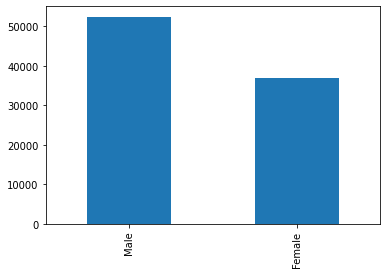

In [52]:
# bar plot to visualize the frequency
train['gender'].value_counts().plot.bar()

In [53]:
# frequency table of a variable will give us the count of each category in that variable
train['profession'].value_counts()              

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

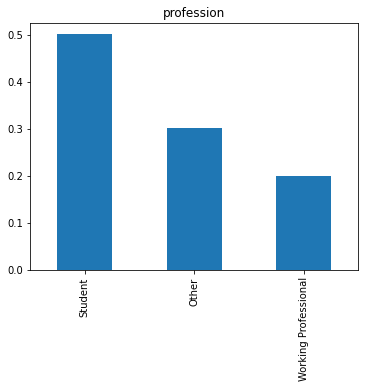

In [54]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['profession'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'profession')

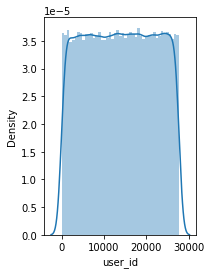

In [55]:
# plt.figure(1)
plt.subplot(121)
df1=train.dropna()
sns.distplot(df1['user_id']);

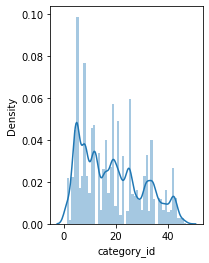

In [56]:
plt.subplot(121)
df2=train.dropna()
sns.distplot(df2['category_id']);

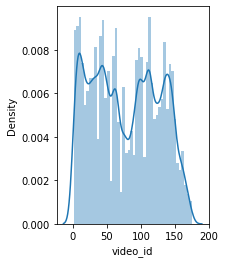

In [57]:
plt.subplot(121)
df3=train.dropna()
sns.distplot(df3['video_id']);

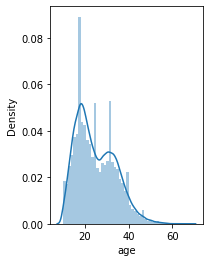

In [58]:
plt.subplot(121)
df4=train.dropna()
sns.distplot(df4['age']);

#### slightly right-skewed. Outlier treatment is needed

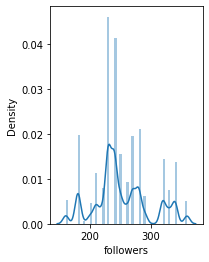

In [59]:
plt.subplot(121)
df5=train.dropna()
sns.distplot(df5['followers']);

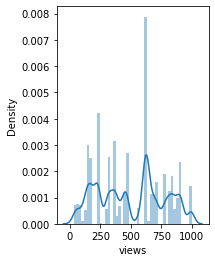

In [60]:
plt.subplot(121)
df6=train.dropna()
sns.distplot(df6['views']);

### Outlier treatment

Text(0.5, 1.0, 'Test')

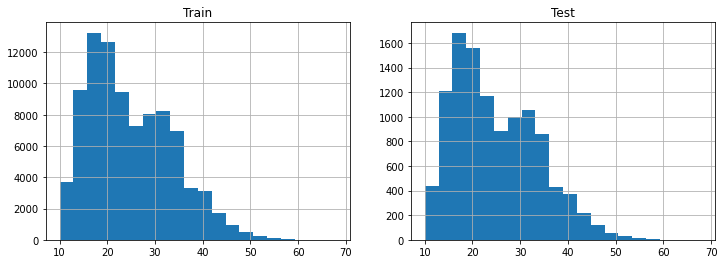

In [61]:
ax1 = plt.subplot(121)
train['age'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['age'].hist(bins=20)
ax2.set_title("Test")

## Step 4: Exploratory Data Analysis

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
row_id,1.000000,-0.006953,0.002833,0.000891,-0.005199,-0.001374,-0.001815,-0.003368
user_id,-0.006953,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002833,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.000891,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.005199,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.001374,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001815,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.003368,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


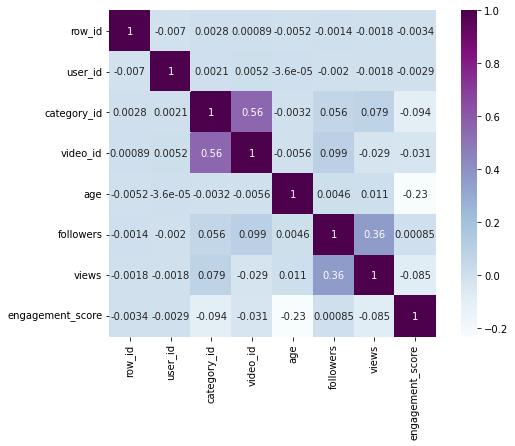

In [62]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

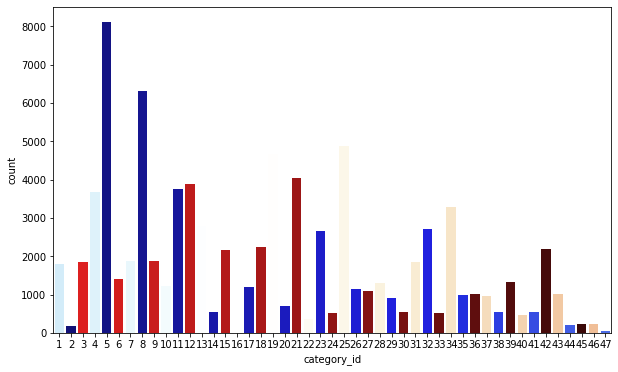

In [63]:
plt.figure(figsize=(10,6))
sns.countplot('category_id',data=train,palette='flag')

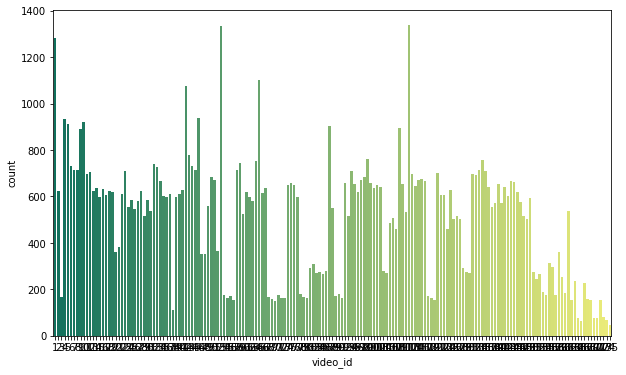

In [64]:
plt.figure(figsize=(10,6))
sns.countplot('video_id',data=train,palette='summer')

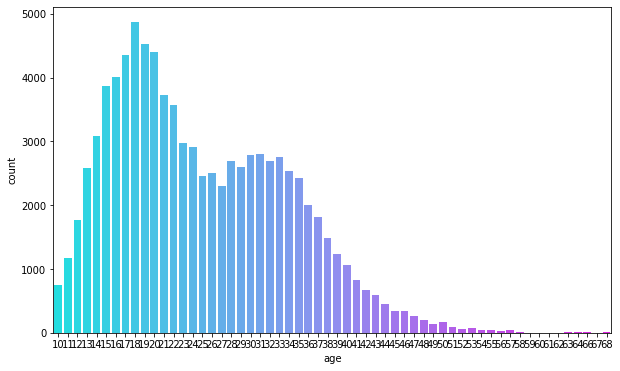

In [65]:
plt.figure(figsize=(10,6))
sns.countplot('age',data=train,palette='cool')

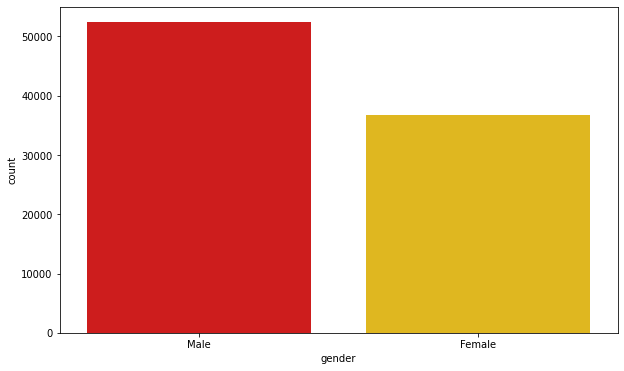

In [66]:
plt.figure(figsize=(10,6))
sns.countplot('gender',data=train,palette='hot')

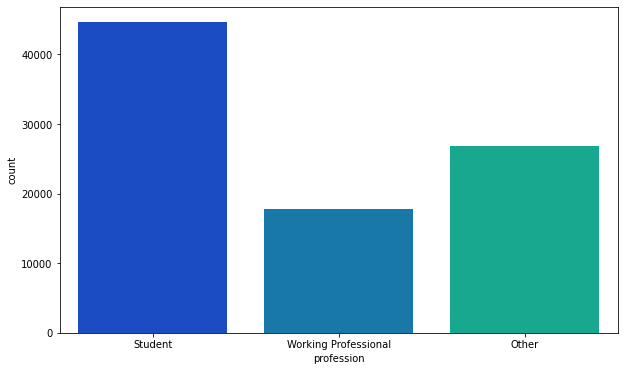

In [67]:
 plt.figure(figsize=(10,6))
sns.countplot('profession',data=train,palette='winter')

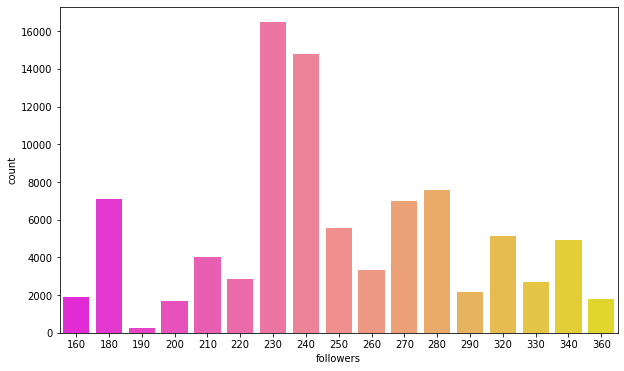

In [68]:
 plt.figure(figsize=(10,6))
sns.countplot('followers',data=train,palette='spring')

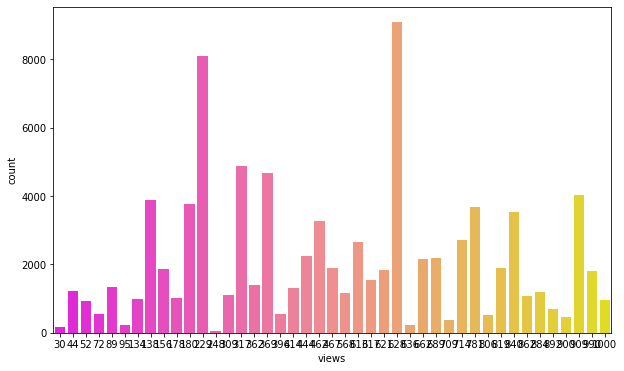

In [69]:
 plt.figure(figsize=(10,6))
sns.countplot('views',data=train,palette='spring')

In [34]:
from sklearn.metrics import r2_score

In [ ]:
#### Test data is further divided into Public (First 20 Days) and Private (Last 41 Days). You will make the prediction for two months (61 days).

In [70]:
train['gender']= train['gender'].astype(str)

In [71]:
train['profession']= train['profession'].astype(str)

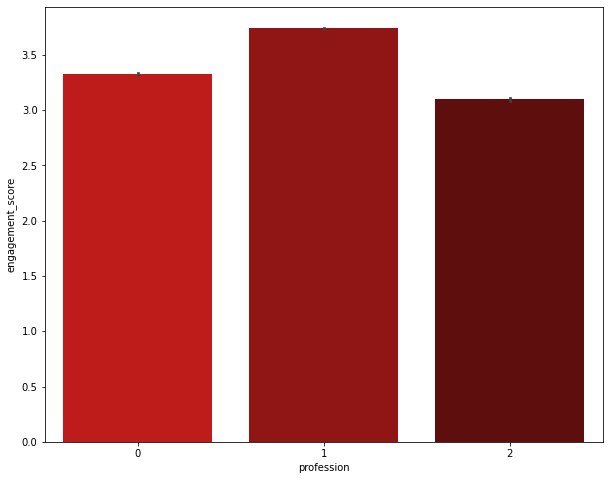

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='profession',y='engagement_score',data=train,palette='flag')

## Step 5:Building Model

In [75]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [76]:
train.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'profession', 'followers', 'views', 'engagement_score'],
      dtype='object')

In [77]:
# Seperate Features and Target
X= train.drop(columns = ['engagement_score'], axis=1)
y= train['engagement_score']

In [79]:
# 40% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4,random_state=200)

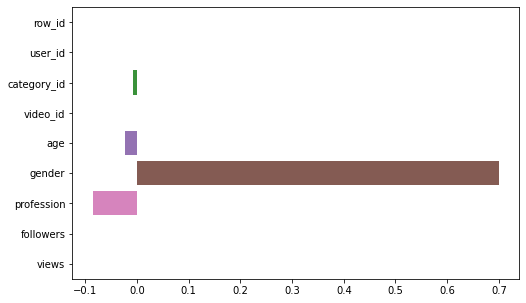

In [81]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [82]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.7500370430511704


In [85]:
submission = pd.read_csv('/sample_submission.csv')
final_predictions = LR.predict(test)
submission['engagement_score'] = final_predictions
#only positive predictions for the target variable
submission['engagement_score'] = submission['engagement_score'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('/my_submission_first_model.csv', index=False)